In [1355]:
import re
import pandas as pd
import datetime

with open('psyduck.txt', 'r', encoding='utf-8') as file:
    chat_data = file.readlines()


In [1356]:
message_pattern = r'(\d{2}/\d{2}/\d{2}), (\d{1,2}:\d{2} [APap][Mm]) - (.*?): (.*)'

dates, times, senders, messages = [], [], [], []

for line in chat_data:
    match = re.match(message_pattern, line)
    if match:
        dates.append(match.group(1))
        times.append(match.group(2))
        senders.append(match.group(3))
        messages.append(match.group(4))
    else:
        if messages:
            messages[-1] += f" {line.strip()}"

df = pd.DataFrame({'Date': dates, 'Time': times, 'Sender': senders, 'Message': messages})


In [1357]:
def convert_to_24_hour(time_str):
    return datetime.strptime(time_str.replace('\u202f', ''), "%I:%M%p").strftime("%H:%M")

# Apply the function to the DataFrame
df['Time'] = df['Time'].apply(convert_to_24_hour)


In [1358]:
for line in chat_data[:10]:
    print(line)


07/03/24, 5:02 pm - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.

07/03/24, 5:02 pm - Psyduck: Kiska kasam khate h Ayush Karn

07/03/24, 5:02 pm - Psyduck: Yash ka? Apna?

07/03/24, 5:02 pm - Ayush Karn: <Media omitted>

07/03/24, 5:02 pm - Ayush Karn: Mummy ka

07/03/24, 5:05 pm - Ayush Karn: ?

07/03/24, 5:06 pm - Ayush Karn: ?

07/03/24, 5:06 pm - Ayush Karn: Megha?

07/03/24, 5:06 pm - Psyduck: Jao Shanti se

07/03/24, 5:07 pm - Ayush Karn: Ok



In [1359]:
message_pattern = r'(\d{2}/\d{2}/\d{2}), (\d{1,2}:\d{2}\s?[APap][Mm])\s-\s(.*?):\s(.*)'

dates, times, senders, messages = [], [], [], []

for line in chat_data:
    match = re.match(message_pattern, line)
    if match:
        if "Messages and calls are end-to-end encrypted" in line:
            continue
        dates.append(match.group(1))
        times.append(match.group(2))
        senders.append(match.group(3))
        messages.append(match.group(4))
    elif '<Media omitted>' not in line:  # Skip media lines
        if messages:  # Handle continuation of a message
            messages[-1] += f" {line.strip()}"

df = pd.DataFrame({'Date': dates, 'Time': times, 'Sender': senders, 'Message': messages})
print(df.head())


       Date     Time      Sender                         Message
0  07/03/24  5:02 pm     Psyduck  Kiska kasam khate h Ayush Karn
1  07/03/24  5:02 pm     Psyduck                  Yash ka? Apna?
2  07/03/24  5:02 pm  Ayush Karn                 <Media omitted>
3  07/03/24  5:02 pm  Ayush Karn                        Mummy ka
4  07/03/24  5:05 pm  Ayush Karn                               ?


In [1360]:
df['Timestamp'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%y %I:%M %p', errors='coerce')

# df.drop(columns=['Date', 'Time'], inplace=True)

df.reset_index(drop=True, inplace=True)
df


,Date,Time,Sender,Message,Timestamp
0,07/03/24,5:02 pm,Psyduck,Kiska kasam khate h Ayush Karn,2024-03-07 17:02:00
1,07/03/24,5:02 pm,Psyduck,Yash ka? Apna?,2024-03-07 17:02:00
2,07/03/24,5:02 pm,Ayush Karn,<Media omitted>,2024-03-07 17:02:00
3,07/03/24,5:02 pm,Ayush Karn,Mummy ka,2024-03-07 17:02:00
4,07/03/24,5:05 pm,Ayush Karn,?,2024-03-07 17:05:00
...,...,...,...,...,...
41195,29/12/24,9:44 pm,Ayush Karn,fir rehne dete hai,2024-12-29 21:44:00
41196,29/12/24,9:45 pm,Psyduck,Kar he de ab Dheere he bolenge,2024-12-29 21:45:00
41197,29/12/24,9:45 pm,Ayush Karn,ok,2024-12-29 21:45:00
41198,29/12/24,9:45 pm,Ayush Karn,null,2024-12-29 21:45:00


In [1361]:
df = df[df['Message'] != '<Media omitted>']


In [1362]:
df.head()
# Step 1: Convert the 'Timestamp' column to datetime if it is not already
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Step 2: Filter rows where the year is 2024
df_2024 = df[df['Timestamp'].dt.year == 2024]
df=df_2024
# Step 3: Display the filtered dataframe
print(df.head())

       Date     Time      Sender                         Message  \
0  07/03/24  5:02 pm     Psyduck  Kiska kasam khate h Ayush Karn   
1  07/03/24  5:02 pm     Psyduck                  Yash ka? Apna?   
3  07/03/24  5:02 pm  Ayush Karn                        Mummy ka   
4  07/03/24  5:05 pm  Ayush Karn                               ?   
5  07/03/24  5:06 pm  Ayush Karn                               ?   

            Timestamp  
0 2024-03-07 17:02:00  
1 2024-03-07 17:02:00  
3 2024-03-07 17:02:00  
4 2024-03-07 17:05:00  
5 2024-03-07 17:06:00  


/tmp/ipykernel_8690/2135637772.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


In [1363]:
# Preview the first 10 lines of the raw chat data
for line in chat_data[:10]:
    print(line)


07/03/24, 5:02 pm - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.

07/03/24, 5:02 pm - Psyduck: Kiska kasam khate h Ayush Karn

07/03/24, 5:02 pm - Psyduck: Yash ka? Apna?

07/03/24, 5:02 pm - Ayush Karn: <Media omitted>

07/03/24, 5:02 pm - Ayush Karn: Mummy ka

07/03/24, 5:05 pm - Ayush Karn: ?

07/03/24, 5:06 pm - Ayush Karn: ?

07/03/24, 5:06 pm - Ayush Karn: Megha?

07/03/24, 5:06 pm - Psyduck: Jao Shanti se

07/03/24, 5:07 pm - Ayush Karn: Ok



In [1364]:
df['Date'] = pd.to_datetime(df['Timestamp'], format='%d/%m/%y, %I:%M %p')
participant_stats = df['Sender'].value_counts()
participant_stats

Sender
Ayush Karn    19597
Psyduck       19355
Name: count, dtype: int64

In [1365]:
df['Hour'] = df['Date'].dt.hour
hourly_activity = df['Hour'].value_counts()
df

,Date,Time,Sender,Message,Timestamp,Hour
0,2024-03-07 17:02:00,5:02 pm,Psyduck,Kiska kasam khate h Ayush Karn,2024-03-07 17:02:00,17
1,2024-03-07 17:02:00,5:02 pm,Psyduck,Yash ka? Apna?,2024-03-07 17:02:00,17
3,2024-03-07 17:02:00,5:02 pm,Ayush Karn,Mummy ka,2024-03-07 17:02:00,17
4,2024-03-07 17:05:00,5:05 pm,Ayush Karn,?,2024-03-07 17:05:00,17
5,2024-03-07 17:06:00,5:06 pm,Ayush Karn,?,2024-03-07 17:06:00,17
...,...,...,...,...,...,...
41195,2024-12-29 21:44:00,9:44 pm,Ayush Karn,fir rehne dete hai,2024-12-29 21:44:00,21
41196,2024-12-29 21:45:00,9:45 pm,Psyduck,Kar he de ab Dheere he bolenge,2024-12-29 21:45:00,21
41197,2024-12-29 21:45:00,9:45 pm,Ayush Karn,ok,2024-12-29 21:45:00,21
41198,2024-12-29 21:45:00,9:45 pm,Ayush Karn,null,2024-12-29 21:45:00,21


<AxesSubplot: title={'center': 'Hourly Activity'}, xlabel='Date'>

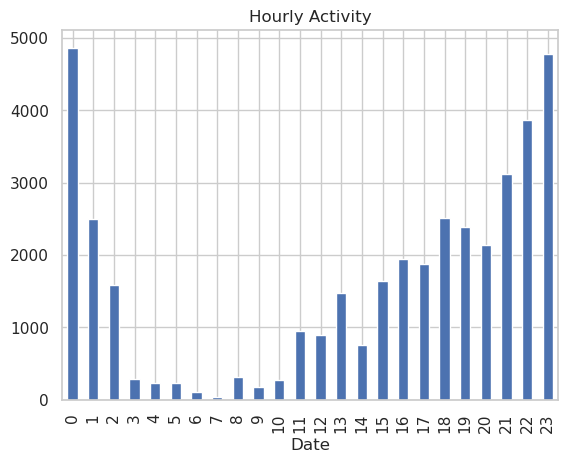

In [1366]:
import matplotlib.pyplot as plt
df.groupby(df['Date'].dt.hour).size().plot(kind='bar', title="Hourly Activity")
# df.groupby(df['Date'].dt.hour).size().sort_values()[-1:].values[0]

In [1367]:
df

,Date,Time,Sender,Message,Timestamp,Hour
0,2024-03-07 17:02:00,5:02 pm,Psyduck,Kiska kasam khate h Ayush Karn,2024-03-07 17:02:00,17
1,2024-03-07 17:02:00,5:02 pm,Psyduck,Yash ka? Apna?,2024-03-07 17:02:00,17
3,2024-03-07 17:02:00,5:02 pm,Ayush Karn,Mummy ka,2024-03-07 17:02:00,17
4,2024-03-07 17:05:00,5:05 pm,Ayush Karn,?,2024-03-07 17:05:00,17
5,2024-03-07 17:06:00,5:06 pm,Ayush Karn,?,2024-03-07 17:06:00,17
...,...,...,...,...,...,...
41195,2024-12-29 21:44:00,9:44 pm,Ayush Karn,fir rehne dete hai,2024-12-29 21:44:00,21
41196,2024-12-29 21:45:00,9:45 pm,Psyduck,Kar he de ab Dheere he bolenge,2024-12-29 21:45:00,21
41197,2024-12-29 21:45:00,9:45 pm,Ayush Karn,ok,2024-12-29 21:45:00,21
41198,2024-12-29 21:45:00,9:45 pm,Ayush Karn,null,2024-12-29 21:45:00,21


In [1368]:
def extract_emojis(text):
    # Unicode range for emojis
    emoji_pattern = r'[\U00010000-\U0010ffff]'
    emojis = re.findall(emoji_pattern, text)
    return emojis

df['Emojis'] = df['Message'].apply(extract_emojis)

print(df[['Sender', 'Message', 'Emojis']].head())

       Sender                         Message Emojis
0     Psyduck  Kiska kasam khate h Ayush Karn     []
1     Psyduck                  Yash ka? Apna?     []
3  Ayush Karn                        Mummy ka     []
4  Ayush Karn                               ?     []
5  Ayush Karn                               ?     []


In [1369]:
df['YearMonth'] = df['Timestamp'].dt.to_period('M')

emoji_counts_by_month = df.explode('Emojis').groupby(['YearMonth', 'Emojis']).size().reset_index(name='Count')

print(emoji_counts_by_month.head())


  YearMonth Emojis  Count
0   2024-03      🌞      1
1   2024-03      🌹      1
2   2024-03      🏻     14
3   2024-03      👌      1
4   2024-03      👍      2


In [1370]:
# Find the most used emoji for each month
most_used_emoji_by_month = emoji_counts_by_month.loc[emoji_counts_by_month.groupby('YearMonth')['Count'].idxmax()]

# Display the result
print(most_used_emoji_by_month[['YearMonth', 'Emojis', 'Count']])


    YearMonth Emojis  Count
8     2024-03      😂    141
33    2024-04      😂     98
65    2024-05      😂     81
87    2024-10      😂      7
100   2024-11      🙄     21
109   2024-12      😂     64


In [1371]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to the 'Message' column
df['Sentiment'] = df['Message'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Check the first few rows
print(df[['Sender', 'Message', 'Sentiment']].head())


       Sender                         Message  Sentiment
0     Psyduck  Kiska kasam khate h Ayush Karn        0.0
1     Psyduck                  Yash ka? Apna?        0.0
3  Ayush Karn                        Mummy ka        0.0
4  Ayush Karn                               ?        0.0
5  Ayush Karn                               ?        0.0


In [ ]:
import emoji
import re
import pandas as pd

# Sample emoji-to-emotion mapping (expand as needed)
emoji_to_emotion = {
    '😊': 'Happiness',
    '😢': 'Sadness',
    '😠': 'Anger',
    '😍': 'Love',
    '❤️':'Love',
    '😎': 'Cool',
    '🎉': 'Excitement',
    '😂': 'Laughter',
    '😜': 'Playfulness',
    '😭': 'Sadness',
    '😡': 'Anger',

}
def extract_emojis(text):
    # Using a regex pattern to find emojis
    return re.findall(r'[^\w\s,]', text)  # Matches all non-word characters (emojis)

def predict_emotion_from_emoji(text):
    emojis = extract_emojis(text)
    emotions = [emoji_to_emotion.get(e, 'Neutral') for e in emojis]
    return emotions

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Month_Year'] = df['Timestamp'].dt.to_period('M')

df['Emotions'] = df['Message'].apply(predict_emotion_from_emoji)

df_exploded = df.explode('Emotions')

df_exploded = df_exploded[df_exploded['Emotions'] != 'Neutral']

emotion_counts = df_exploded.groupby(['Month_Year', 'Emotions']).size().reset_index(name='Count')

top_3_emotions_per_month = emotion_counts.groupby('Month_Year').apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)

print(top_3_emotions_per_month[['Month_Year', 'Emotions', 'Count']])


   Month_Year  Emotions  Count
0     2024-03  Laughter    141
1     2024-03   Sadness     66
2     2024-03      Cool      1
3     2024-04  Laughter     98
4     2024-04   Sadness     21
5     2024-05  Laughter     81
6     2024-05   Sadness     15
7     2024-10  Laughter      7
8     2024-11  Laughter     19
9     2024-11   Sadness      3
10    2024-12  Laughter     64
11    2024-12   Sadness      9


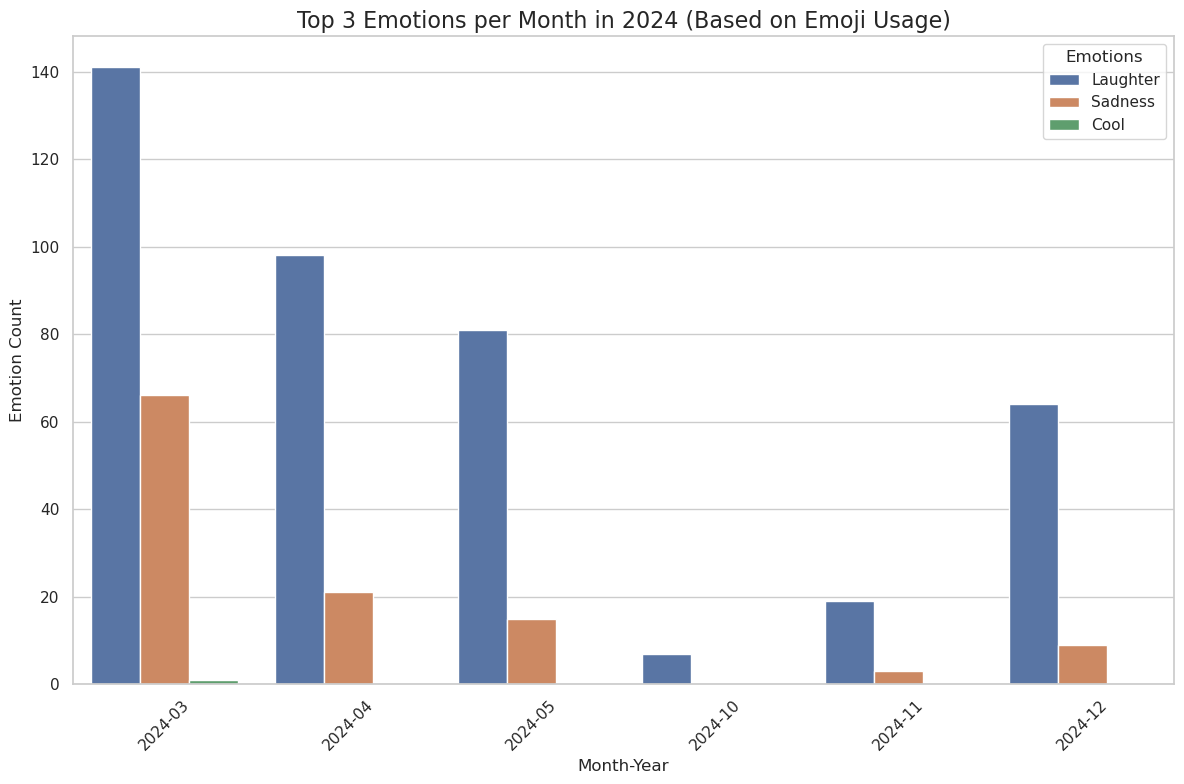

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

sns.barplot(data=top_3_emotions_per_month, x='Month_Year', y='Count', hue='Emotions', dodge=True)

plt.xticks(rotation=45)

plt.title('Top 3 Emotions per Month in 2024 (Based on Emoji Usage)', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Emotion Count', fontsize=12)

plt.tight_layout()
plt.show()


In [1374]:
print(df.groupby(df['Date'].dt.hour).size().sort_values()[-1:].values[0])
print(df.groupby(df['Date'].dt.hour).size().sort_values()[-1:].index[0])

4865
0


  Month_Year  Emotions  Count
0    2024-03  Laughter   70.5
1    2024-03   Sadness   66.0
2    2024-03      Cool    1.0
3    2024-04  Laughter   49.0
4    2024-04   Sadness   21.0


/tmp/ipykernel_8690/2472266382.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[70.5 49.  40.5  3.5  9.5 32. ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  top_3_emotions_per_month.loc[top_3_emotions_per_month['Emotions'] == 'Laughter', 'Count'] /= 2


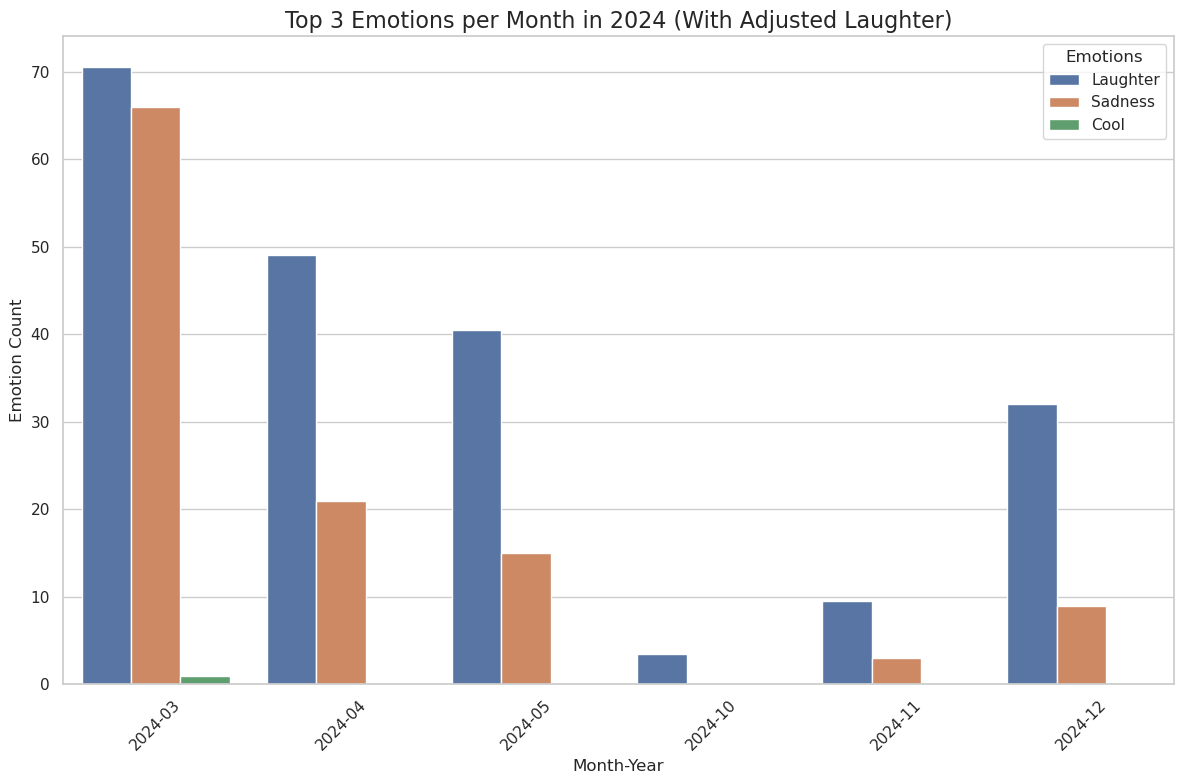

In [ ]:
laughter_emotions = top_3_emotions_per_month[top_3_emotions_per_month['Emotions'] == 'Laughter']

top_3_emotions_per_month.loc[top_3_emotions_per_month['Emotions'] == 'Laughter', 'Count'] /= 2

print(top_3_emotions_per_month.head())

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

sns.barplot(data=top_3_emotions_per_month, x='Month_Year', y='Count', hue='Emotions', dodge=True)

plt.xticks(rotation=45)

plt.title('Top 3 Emotions per Month in 2024 (With Adjusted Laughter)', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Emotion Count', fontsize=12)

plt.tight_layout()
plt.show()


In [1376]:
df

,Date,Time,Sender,Message,Timestamp,Hour,Emojis,YearMonth,Sentiment,Month_Year,Emotions
0,2024-03-07 17:02:00,5:02 pm,Psyduck,Kiska kasam khate h Ayush Karn,2024-03-07 17:02:00,17,[],2024-03,0.000,2024-03,[]
1,2024-03-07 17:02:00,5:02 pm,Psyduck,Yash ka? Apna?,2024-03-07 17:02:00,17,[],2024-03,0.000,2024-03,"[Neutral, Neutral]"
3,2024-03-07 17:02:00,5:02 pm,Ayush Karn,Mummy ka,2024-03-07 17:02:00,17,[],2024-03,0.000,2024-03,[]
4,2024-03-07 17:05:00,5:05 pm,Ayush Karn,?,2024-03-07 17:05:00,17,[],2024-03,0.000,2024-03,[Neutral]
5,2024-03-07 17:06:00,5:06 pm,Ayush Karn,?,2024-03-07 17:06:00,17,[],2024-03,0.000,2024-03,[Neutral]
...,...,...,...,...,...,...,...,...,...,...,...
41195,2024-12-29 21:44:00,9:44 pm,Ayush Karn,fir rehne dete hai,2024-12-29 21:44:00,21,[],2024-12,0.000,2024-12,[]
41196,2024-12-29 21:45:00,9:45 pm,Psyduck,Kar he de ab Dheere he bolenge,2024-12-29 21:45:00,21,[],2024-12,0.000,2024-12,[]
41197,2024-12-29 21:45:00,9:45 pm,Ayush Karn,ok,2024-12-29 21:45:00,21,[],2024-12,0.296,2024-12,[]
41198,2024-12-29 21:45:00,9:45 pm,Ayush Karn,null,2024-12-29 21:45:00,21,[],2024-12,0.000,2024-12,[]


In [1377]:
print(df[['Message', 'Emojis']])


                              Message Emojis
0      Kiska kasam khate h Ayush Karn     []
1                      Yash ka? Apna?     []
3                            Mummy ka     []
4                                   ?     []
5                                   ?     []
...                               ...    ...
41195              fir rehne dete hai     []
41196  Kar he de ab Dheere he bolenge     []
41197                              ok     []
41198                            null     []
41199                        Soo gyi?     []

[38952 rows x 2 columns]


In [ ]:
df_with_emojis = df[df['Emojis'].apply(lambda x: len(x) > 0)]
df_with_emojis

,Date,Time,Sender,Message,Timestamp,Hour,Emojis,YearMonth,Sentiment,Month_Year,Emotions
58,2024-03-07 17:35:00,5:35 pm,Ayush Karn,Itna time ka chat ura diye hum 😭,2024-03-07 17:35:00,17,[😭],2024-03,0.0,2024-03,[Sadness]
151,2024-03-23 23:11:00,11:11 pm,Ayush Karn,😂,2024-03-23 23:11:00,23,[😂],2024-03,0.0,2024-03,[Laughter]
188,2024-03-23 23:15:00,11:15 pm,Ayush Karn,😒,2024-03-23 23:15:00,23,[😒],2024-03,0.0,2024-03,[Neutral]
208,2024-03-23 23:18:00,11:18 pm,Ayush Karn,😒,2024-03-23 23:18:00,23,[😒],2024-03,0.0,2024-03,[Neutral]
231,2024-03-23 23:22:00,11:22 pm,Ayush Karn,Hum larkibaz hai?🙄,2024-03-23 23:22:00,23,[🙄],2024-03,0.0,2024-03,"[Neutral, Neutral]"
...,...,...,...,...,...,...,...,...,...,...,...
40496,2024-12-28 12:32:00,12:32 pm,Ayush Karn,Exam over🥳🥳,2024-12-28 12:32:00,12,"[🥳, 🥳]",2024-12,0.0,2024-12,"[Neutral, Neutral]"
40721,2024-12-29 13:32:00,1:32 pm,Ayush Karn,😑,2024-12-29 13:32:00,13,[😑],2024-12,0.0,2024-12,[Neutral]
40733,2024-12-29 13:34:00,1:34 pm,Ayush Karn,😑,2024-12-29 13:34:00,13,[😑],2024-12,0.0,2024-12,[Neutral]
41036,2024-12-29 18:11:00,6:11 pm,Ayush Karn,Veg bhi khayenge 🥹,2024-12-29 18:11:00,18,[🥹],2024-12,0.0,2024-12,[Neutral]


In [ ]:
all_emojis = ''.join([emoji for sublist in df_with_emojis['Emojis'] for emoji in sublist])
all_emojis

'😭😂😒😒🙄🥹😂🥹😂😂😂😂😂🙄🤦🏻😒😂😂😂🥹🥹😂😂🙄😂😌🥹😑🤷🏻😂😒🙄😂😂😂🌞😭😂🙄😂🤦🏻😂😂😓🙄🙄😎😂😂🙄😭😭🙄😂😂😑🙄🤷🏻😭😭😭😭😭😭😭🙄😭🙄🙄🤷🏻😂😭🤷🏻😂😂🥹😂😂🥺🥺🙄🙄🙄😂😂👍🏻😂🙄🙄😂😑🙄🙄🙄🙄🙄🙄😂😂😂🙄🙄🙄😑🥹🥹😑😂😂😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭🥹🙄😂😂🙄😂😂🥹🙄😂😂😂😂😂😂😂🙄🙄🥹😂😂😂😂😂😂😂😂😂😂🙄😂😭🥰🥰🥰😭😂😂😂😂😂😭😂😂😂😂😂🙄😂😂🙄😂😂🙄😂🙄🙄😂😂😂🙄😌😂😭😭😭😂😂😂😂😂💀😂🙄😂🥹😂😂😭😭😂🤷🏻🙄🙄😂😂😂🙄😑😁😂😭😭😭😭😭😑🙄😭😭👍🏻😁😂😂😂🤷🏻🥹🥺😂😂🤷🏻😭😂😂😂🙄👏👏👏😑🙄😂😭😭😭😂😂😂😂😑👌😂😂😂😂😂🙄🙄🙄😒😭😂🙄😂😂😂🙄😂🙄🙄🙄🌹🙄😂😂😂😂🤷🏻😂😂😂😂😂😂😂😂😂😂😂😂🥹🙄😭🤫😭😭😭😭😭😭😭🤷🏻😑🤷🏻😭🙄🙄🙄😂😂😂😭😭😂😂😭😂😂😭🙄😞😂😭😭😭😭😭😭😭😭😂🤷🏻😂😂🥹😑😭🙄😂😂🙄😂😂🙄😭🙄🙄🤦🏻😑🙄😭🙄🙄😭😂😂😂😂😂😭😂😂😭😭🙄😭😂😭👍🏻👍🏻👍🏻😂😂😂😂😂😂😂😂😭😭😁😂😂😂😂😂😭😂🙄🥹😂😂🙄🙄😂😂😂😂😂🤷🏻😂😂😂😂😂😂😂😂🍍🍍🍍🍍🙄🥚🐣🐥🐔🍗😭😂😂😂🙄🙄🙄🥹😂😂😂😮😌😂😂😂🌹🙄😂🤷🏻🙄🙄🙄🙄🙄🖕🏻😂😂😂😂😂🤝😂🤷🏻😂😂😂😂😂😂😂😂🙄😂😂😂😂😂😬😭🙄😭😂😂😂🙄😂😂😂😂😁😂😂🙄🥹😂😂😂😂🙄🥹😞🙄🙄😂😂🤦🏻😂😭😂😭🙄🙄🙄😂🙄😂😂👍🏻👍🏻😂👍🏻😒🤷🏻😂👍🏻😂😂😂🥹😂😂🙄🙄😘🥹🙄😂🙄👍🏻😂😂😭😭😂🙄👍🏻🥹🙄😂😒🥹😭😭😭😂😂🙄🥹🥹🙄🙄🥰🥰😌😂🙄🥹😭😭😭🥹🥰🥰😂😂😂🥰🥹🙄😂😂😂😂😂🤦🏻😁😁😂😂🤷🏻🥺🙄😂😂😒😂🥹😂🙄😂😂😂😂😂😂😂👍🏻😂😂🙄😂😂😂😌🙄🤦🏻😂😂😁😁😂🙄😂😂😂😂👄🫦🐒🐧🏃🐦🍰🍻🧊🙄🙄🤷🏻🙄😂🤷🏻😂😂😂🙄😌😂🤷🏻😂🙄🤷🏻🙄😂😂😂😂😂😂🤷🏻😒😂😂😂🎀😂😂🙄😂🎀🙄😂😒😂😂🙄😂🙄😂😂😂😭😂😂😂😂🙄🙄😒😂😂🚪🚪🚪🥳🥳🥳🥳🥳🥹🙄🍕😭😭🐽🍉🥭🍎🍎🍧🍎🍎🍓🍎🍎🍎🍎🍓🍎🍎🍉🍎🍎🍋😑🙄🙄😑🙄🙄😂😂🙄🙄🙄🥹🙄🥹😂😬🥹🙄😑🤷🏻🤩🤩😒😂🤷🏻🙄😂😂😂😭😌😭😭🙄🍕🙄😁😁🤩😭🥹😂😂😂🙄🙄🙄🙄😂👍🏻😂😂🥱🙄😌🙄😂🤦🏻🤦🏻🎇🎇🪔🪔🪔😂🤷🏻🙄🥱🙄😭🙄🙄🥱🥳😂😌😂😑🙄😂🥱😂🙄😂🙄🙄🤷🏻🙄🤷🏻😂😂😂🙄😂🙄🤦🏻🥱🥱😂🙄🤦🏻🤷🏻🤷🏻😌🤦🏻😂🙄😂😂🙄🙄🙄🥹😂😂😂🙄🙄🙄🙄😂🙄🥹😭😭👰🏻😂😋😂😂😂😂😂😭🙄🙄🙄🙄😁🥹😂🙄😂😂🙄😞🙄😂🙄🙄😂🙄🤧🙄🙄😂🙄😂😂😂🙄🙄😂😂😂😂😂😂👀😂😭😂😂🙄🙄😂😂😭😭😂🤷🏻🙄😂😂😂🥹🙄🙄🙄🙄🙄🥹😂🤷🏻🙄🤧😂😂🥹🤦🏻😂😂😂😂😂🥹😂🥹😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂

In [ ]:
emoji_counts = Counter(all_emojis)


top_3_emojis = emoji_counts.most_common(3)

top_3_emojis


[('😂', 410), ('🙄', 186), ('😭', 114)]

In [1381]:
df['Emojis']

0        []
1        []
3        []
4        []
5        []
         ..
41195    []
41196    []
41197    []
41198    []
41199    []
Name: Emojis, Length: 38952, dtype: object

In [ ]:
emoji_sentiments = {
    '😂': 1,   # Happy
    '🤣': 1,   # Happy
    '🥹': 0, # Happy
    '🥰': 0.8, # Happy
    '😭': -2,  # Sad
    '😔': -1, # Sad
    '😢': -2,  # Sad
    '😞': -0.9, # Sad
    '😩': -0.9, # Sad
}

# Function to get sentiment for emojis in a row
def get_sentiment(emojis):
    sentiment = 0
    for emoji in emojis:
        sentiment += emoji_sentiments.get(emoji, 0)  # Default to 0 if emoji is not in the dictionary
    return sentiment

# Apply the function to calculate sentiment for each row
df['Sentiment'] = df['Emojis'].apply(get_sentiment)

# Group by 'YearMonth' and calculate the total sentiment for each month
monthly_sentiment = df.groupby('YearMonth')['Sentiment'].sum().reset_index()

# Find the happiest and saddest month
happiest_month = monthly_sentiment.loc[monthly_sentiment['Sentiment'].idxmax()]
saddest_month = monthly_sentiment.loc[monthly_sentiment['Sentiment'].idxmin()]

# print("Happiest Month:", happiest_month)
# print("Saddest Month:", saddest_month)
# Get the happiest and saddest month names
happiest_month_name = happiest_month['YearMonth']
saddest_month_name = saddest_month['YearMonth']

print("Happiest Month:", happiest_month_name)
print("Saddest Month:", saddest_month_name)


Happiest Month: 2024-04
Saddest Month: 2024-06


In [1383]:
m_dict = {
    "2024-01": "January",
    "2024-02": "February",
    "2024-03": "March",
    "2024-04": "April",
    "2024-05": "May",
    "2024-06": "June",
    "2024-07": "July",
    "2024-08": "August",
    "2024-09": "September",
    "2024-10": "October",
    "2024-11": "November",
    "2024-12": "December"
}
print("Happiest month : ",m_dict[str(happiest_month_name)])
print("Saddest month : ",m_dict[str(saddest_month_name)])

Happiest month :  April
Saddest month :  June


In [1384]:
#Summary
e=''
for i in top_3_emojis:
    e+=i[0]
print('Top emojis of the conversation : ',e)

Top emojis of the conversation :  😂🙄😭


In [1385]:
#who texts first after gap of 4 hours
#most active day total msgs
#most active month

In [1386]:
import pandas as pd

# Assuming you have a DataFrame 'df' with columns 'Sender' and 'Timestamp'

# Ensure 'Timestamp' is a datetime object
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Sort by timestamp to ensure chronological order
df = df.sort_values(by='Timestamp')

# Calculate the time difference between consecutive messages
df['Time_Diff'] = df['Timestamp'].diff().dt.total_seconds() / 3600  # Convert seconds to hours

# Identify rows where the time difference is >= 4 hours
df['Gap_Over_4hrs'] = df['Time_Diff'] >= 4

# Shift the 'Gap_Over_4hrs' column to align with the sender of the message after the gap
df['First_After_Gap'] = df['Gap_Over_4hrs'].shift(fill_value=False)

# Filter for messages that are the first after a gap
first_after_gap = df[df['First_After_Gap']]

# Count the frequency of who sends the first message after a gap
frequency = first_after_gap['Sender'].value_counts()

# print("Frequency of who texts first after a gap of 4 hours:")
# print(frequency)


In [1387]:
import pandas as pd

# Assuming 'df' has a 'Timestamp' column
df['Date'] = df['Timestamp'].dt.date  # Extract the date from the Timestamp

# Count the number of messages for each date
daily_message_count = df.groupby('Date').size().reset_index(name='Message_Count')

# Find the most active day
most_active_day = daily_message_count.loc[daily_message_count['Message_Count'].idxmax()]

# Get the date and the total number of messages
most_active_date = most_active_day['Date']
total_messages = most_active_day['Message_Count']

print(f"Most Active Day: {most_active_date}")
print(f"Total Messages on that Day: {total_messages}")


Most Active Day: 2024-03-24
Total Messages on that Day: 1756


In [1388]:
import datetime

def format_date(date_str):
    # Parse the date string
    date_obj = datetime.datetime.strptime(date_str, "%Y-%m-%d")
    
    # Get the day, month, and year
    day = date_obj.day
    month = date_obj.strftime("%B")  # Full month name
    year = date_obj.year
    
    # Determine the ordinal suffix for the day
    if 10 <= day % 100 <= 20:  # Handles 11th, 12th, 13th, etc.
        suffix = "th"
    else:
        suffix = {1: "st", 2: "nd", 3: "rd"}.get(day % 10, "th")
    
    # Format the date
    formatted_date = f"{day}{suffix} {month}, {year}"
    return formatted_date



In [ ]:
output_summary = f"""
Number of times {frequency.index[0]} texted first: {frequency[frequency.index[0]]}
Number of times {frequency.index[1]} texted first: {frequency[frequency.index[1]]}
Most Active Day: {format_date(str(most_active_date))}
Total Messages on that Day: {total_messages}
Happiest Month: {happiest_month_name}
Saddest Month: {saddest_month_name}
Top emojis of the conversation: {e}
"""
print(output_summary)


Number of times Psyduck texted first: 109
Number of times Ayush Karn texted first: 105
Most Active Day: 24th March, 2024
Total Messages on that Day: 1756
Happiest Month: 2024-04
Saddest Month: 2024-06
Top emojis of the conversation: 😂🙄😭



In [1390]:
df['Time']

0        5:02 pm
1        5:02 pm
3        5:02 pm
4        5:05 pm
5        5:06 pm
          ...   
41190    9:44 pm
41197    9:45 pm
41198    9:45 pm
41196    9:45 pm
41199    2:13 am
Name: Time, Length: 38952, dtype: object

In [ ]:
import pandas as pd
from datetime import timedelta

def longest_streak(data):
    data = data.sort_values(by='Timestamp').reset_index(drop=True)
    max_streak_duration = timedelta(0)
    current_streak_start = data['Timestamp'].iloc[0]

    for i in range(1, len(data)):
        time_diff = data['Timestamp'].iloc[i] - data['Timestamp'].iloc[i - 1]

        if time_diff < timedelta(minutes=10):
            continue
        else:
            # End the current streak and calculate its duration
            current_streak_duration = data['Timestamp'].iloc[i - 1] - current_streak_start
            max_streak_duration = max(max_streak_duration, current_streak_duration)
            # Start a new streak
            current_streak_start = data['Timestamp'].iloc[i]

    # Handle the final streak
    final_streak_duration = data['Timestamp'].iloc[-1] - current_streak_start
    max_streak_duration = max(max_streak_duration, final_streak_duration)

    # Convert duration to a readable format
    hours, remainder = divmod(max_streak_duration.total_seconds(), 3600)
    minutes, seconds = divmod(remainder, 60)

    return f"{int(hours)} hours, {int(minutes)} minutes"

print(longest_streak(df))
output_summary+=f"Longest conversation: {longest_streak(df)}\n"


3 hours, 6 minutes


In [1392]:
import pandas as pd
from datetime import timedelta

def longest_day_streak(data):
    """
    Calculate the longest streak of consecutive days with at least one message.

    Args:
    data (pd.DataFrame): DataFrame with a column 'Timestamp' containing datetime objects.

    Returns:
    int: The length of the longest streak in days.
    """
    # Extract the dates from the timestamps
    data['Date'] = data['Timestamp'].dt.date

    # Get the unique days when messages were sent
    unique_days = sorted(data['Date'].unique())

    # Initialize variables
    longest_streak = 0
    current_streak = 1

    for i in range(1, len(unique_days)):
        if unique_days[i] == unique_days[i - 1] + timedelta(days=1):
            # Consecutive day, increase the streak
            current_streak += 1
        else:
            # Break in streak, update the longest streak
            longest_streak = max(longest_streak, current_streak)
            current_streak = 1

    # Handle the final streak
    longest_streak = max(longest_streak, current_streak)

    return longest_streak

# Example usage:
# Assuming df is your DataFrame and 'Timestamp' column is of datetime type
# df['Timestamp'] = pd.to_datetime(df['Timestamp'])
print(f"Longest streak of days talked: {longest_day_streak(df)} days")
output_summary+=f"Longest streak of days talked: {longest_day_streak(df)} days\n"

Longest streak of days talked: 41 days


In [1393]:
df['Time']

0        5:02 pm
1        5:02 pm
3        5:02 pm
4        5:05 pm
5        5:06 pm
          ...   
41190    9:44 pm
41197    9:45 pm
41198    9:45 pm
41196    9:45 pm
41199    2:13 am
Name: Time, Length: 38952, dtype: object

In [1394]:
# df.groupby(df['Date'].dt.hour).size().sort_values()[-1:].index[0]
hour_counts = Counter(df['Hour'])
peak_hour = hour_counts.most_common(1)[0][0]
output_summary+=f"Peak chatting hour: {peak_hour}"

In [1395]:
print(output_summary)


Number of times Psyduck texted first: 109
Number of times Ayush Karn texted first: 105
Most Active Day: 24th March, 2024
Total Messages on that Day: 1756
Happiest Month: 2024-04
Saddest Month: 2024-06
Top emojis of the conversation: 😂🙄😭
Longest conversation: 3 hours, 6 minutes
Longest streak of days talked: 41 days
Peak chatting hour: 0
